# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [26]:
# read in readmissions data provided
hospital_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [27]:
# deal with missing and inconvenient portions of data 
clean_hospital_df = hospital_df[hospital_df['Number of Discharges'] != 'Not Available']
clean_hospital_df.loc[:, 'Number of Discharges'] = clean_hospital_df['Number of Discharges'].astype(int)
clean_hospital_df = clean_hospital_df.sort_values('Number of Discharges')

C:\Users\ngmat\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


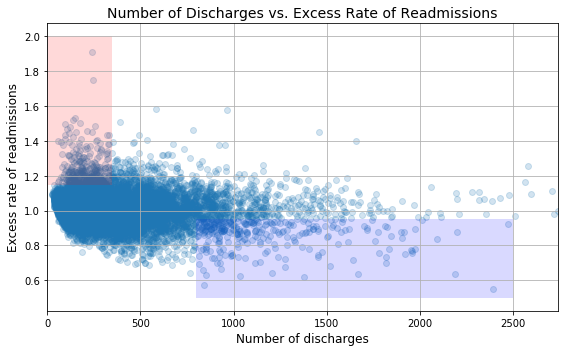

In [28]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
x = [a for a in clean_hospital_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_df['Excess Readmission Ratio'][81:-3])

fig, p = plt.subplots(figsize=(8,5))
p.scatter(x, y,alpha=0.2)

p.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
p.fill_between([800,2500], .5, .95, facecolor='blue', alpha = .15, interpolate=True)

p.set_xlim([0, max(x)])
p.set_xlabel('Number of discharges', fontsize=12)
p.set_ylabel('Excess rate of readmissions', fontsize=12)
p.set_title('Number of Discharges vs. Excess Rate of Readmissions', fontsize=14)

p.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. Do you agree with the above analysis and recommendations? Why or why not?


I don't entirely agree with the above Preliminary report because of missing sound statistical analysis and analysis was based only on graph. Below are my critique.

1) The missing data was handled properly above by dropping rows with null values.

2) Initial observations is entirely based on plot alone and not tested for statistical significance and correlation coefficient was not calculated.

3) In the statistical analysis - There is no "Hypothesis test" done and hospital capacity was grouped only into two: number of discharges 1000. The group of 100 <=number of discharges<=1000 was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

4) Conclusions were not back up with a solid statistical analysis and Hypothesis testing for proof.

B.1. The null hypothesis, H0, is that there is no difference in mean excess readmission rates. HA is that a difference in the means of the two samples do exist. A T-distribution and test statistic can be used to evaluate the hypothesis.

In [29]:
ld = clean_hospital_df[clean_hospital_df['Number of Discharges']<100]
hd = clean_hospital_df[clean_hospital_df['Number of Discharges']>1000]

In [30]:
from scipy import stats
T, p = stats.ttest_ind(ld['Excess Readmission Ratio'].dropna(), 
                       hd['Excess Readmission Ratio'].dropna(), 
                       equal_var=False)
print('Test Statistic (T):', T)
print('p-value:', p)

Test Statistic (T): 7.601742418500486
p-value: 1.2752435451140344e-13


In [31]:
clean_hospital_df[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


Since the p-value is much smaller than the significance level (a = 0.01), there is convincing evidence to reject the null hypothesis. Therefore, the difference in the mean excess readmission ratios for hospitals with over 1000 discharges compared to those with less than 100 discharges was statistically significant. The correlation coefficient is -0.097, so there is a slight negative correlation between the size of a hospital and its excess readmissions; readmission rates drop slightly as the number of discharges increases. There it means that there are other factors that contribute to the excess readmission ratio.

Analysis:
While the analysis appears to be correct, I disagree with the recommendation to require consolidation of smaller facilities into larger facilities. Further cost-benefit analysis is required, but it looks as though the drop in the readmission rate, while real and statistically significant, may not have a sufficient practical significance to warrant the recommendations to upgrade smaller facilities and consolidate into larger facilities. 

5. Look at the scatterplot

What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

Advantages:
Good Amount of Information,
Good and Bad Areas are clearly located,
Relationships are Clear,
Labels are Clear

Disadvantages:
It is difficult to see the difference or boundary of in the samples that have excess readmission ratio

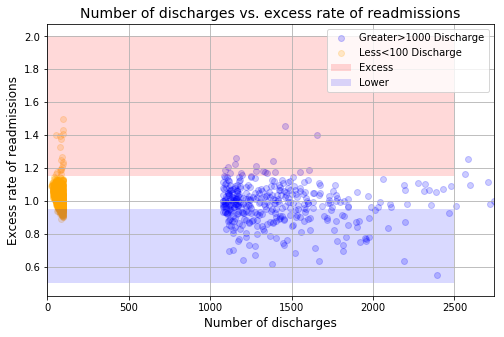

In [33]:

# generate a scatterplot for number of discharges vs. excess rate of readmissions

x = [a for a in hd['Number of Discharges'][81:-3]]
y = list(hd['Excess Readmission Ratio'][81:-3])

q = [a for a in ld['Number of Discharges'][81:-3]]
t = list(ld['Excess Readmission Ratio'][81:-3])


fig, p = plt.subplots(figsize=(8,5))
p.scatter(x, y,alpha=0.2, color='blue', label='Greater>1000 Discharge')
p.scatter(q, t,alpha=0.2, color='orange', label='Less<100 Discharge')

p.fill_between([0,2500], 1.15, 2, facecolor='red', alpha = .15, interpolate=True, label='Excess')
p.fill_between([0,2500], .5, .95, facecolor='blue', alpha = .15, interpolate=True, label='Lower')

p.set_xlim([0, max(x)])
p.set_xlabel('Number of discharges', fontsize=12)
p.set_ylabel('Excess rate of readmissions', fontsize=12)
p.set_title('Number of discharges vs. excess rate of readmissions', fontsize=14)
p.legend(loc='upper right')

p.grid(True)


